In [84]:
import os
os.listdir("results")

['2019-02-07_04:14:58_834386']

In [147]:
import json

timestamp = "2019-02-07_22:07:57_595677"
train_results = None
test_results = None
with open("results/" + timestamp + "/train.json") as train_fp:
    train_results = json.load(train_fp)
    
with open("results/" + timestamp + "/test.json") as test_fp:
    test_results = json.load(test_fp)

In [148]:
keep_pcts = list(test_results.keys())

In [149]:
import matplotlib.pyplot as plt
for keep_pct in keep_pcts:
    num_accs = [x["num_acc"] for x in test_results[keep_pct]]
    col_accs = [x["col_acc"] for x in test_results[keep_pct]]
    test_accs = [x["acc"] for x in test_results[keep_pct]]
    left_out_num_accs = [x["left_out_num_acc"] for x in test_results[keep_pct]] # TODO handle nones
    left_out_col_accs = [x["left_out_col_acc"] for x in test_results[keep_pct]]
    left_out_accs = [x["left_out_acc"] for x in test_results[keep_pct]]
    non_left_out_num_accs = [x["non_left_out_num_acc"] for x in test_results[keep_pct]]
    non_left_out_col_accs = [x["non_left_out_col_acc"] for x in test_results[keep_pct]]
    non_left_out_accs = [x["non_left_out_acc"] for x in test_results[keep_pct]]
    num_loss = [x["num_loss"] for x in test_results[keep_pct]]
    col_loss = [x["col_loss"] for x in test_results[keep_pct]]
    loss = [x["loss"] for x in test_results[keep_pct]]
    plt.figure(1)
    plt.plot([x for x in range(1, len(test_accs) + 1)], test_accs, label="{0}%".format(100 * keep_pct))
    plt.figure(2)
    plt.plot([x for x in range(1, len(left_out_accs) + 1)], left_out_accs, label="{0}%".format(100 * keep_pct))
    plt.figure(3)
    plt.plot([x for x in range(1, len(non_left_out_accs) + 1)], non_left_out_accs, label="{0}%".format(100 * keep_pct))

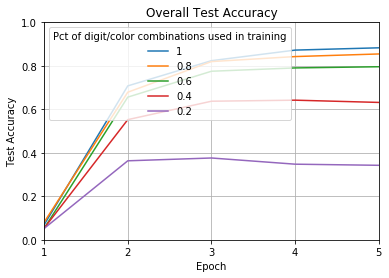

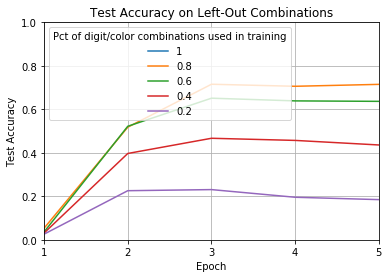

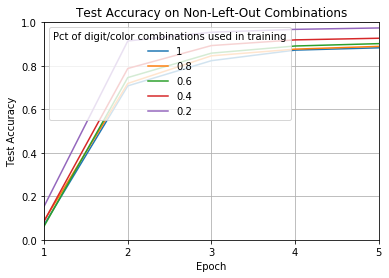

In [150]:
# os.mkdir("plots/" + timestamp)

plt.figure(1)
plt.legend(keep_pcts, loc='upper left', title="Pct of digit/color combinations used in training")
plt.xlim(1, 5)
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Overall Test Accuracy')
plt.grid(True)
plt.xticks([x for x in range(1, 6)])

plt.figure(2)
plt.legend([x for x in keep_pcts if x != 1], loc='upper left', title="Pct of digit/color combinations used in training")
plt.xlim(1, 5)
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy on Left-Out Combinations')
plt.grid(True)
plt.xticks([x for x in range(1, 6)])

plt.figure(3)
plt.legend(keep_pcts, loc='upper left', title="Pct of digit/color combinations used in training")
plt.xlim(1, 5)
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy on Non-Left-Out Combinations')
plt.grid(True)
plt.xticks([x for x in range(1, 6)])
plt.show()

In [153]:
os.mkdir("plots/" + timestamp)

plt.figure(1)
plt.savefig("plots/" + timestamp + "/test_acc.pdf")
plt.clf()
plt.figure(2)
plt.savefig("plots/" + timestamp + "/left_out_acc.pdf")
plt.clf()
plt.figure(3)
plt.savefig("plots/" + timestamp + "/non_left_out_acc.pdf")
plt.clf()

In [154]:
left_out_final_num_accs = [test_results[keep_pct][-1]["left_out_num_acc"] for keep_pct in keep_pcts]
left_out_final_col_accs = [test_results[keep_pct][-1]["left_out_col_acc"] for keep_pct in keep_pcts]

<Figure size 432x288 with 0 Axes>

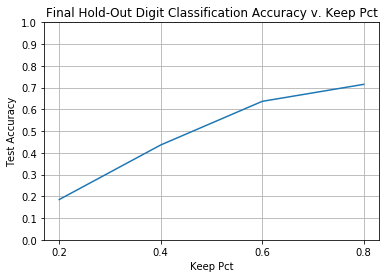

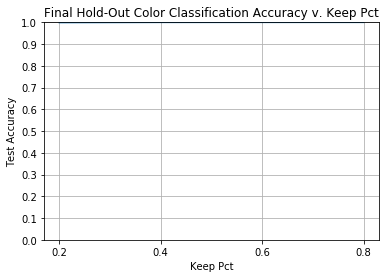

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [155]:
plt.figure(4)
plt.plot(keep_pcts[::-1], left_out_final_num_accs[::-1])
# plt.xlim(0.2, 0.8)
plt.ylim(0, 1)
plt.xlabel('Keep Pct')
plt.ylabel('Test Accuracy')
plt.title("Final Hold-Out Digit Classification Accuracy v. Keep Pct")
plt.grid(True)
# plt.xticks([x / 5  for x in range(1, 5)])
plt.yticks([x / 10. for x in range(0, 11)])

plt.figure(5)
plt.plot(keep_pcts[::-1], left_out_final_col_accs[::-1])
# plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Keep Pct')
plt.ylabel('Test Accuracy')
plt.title("Final Hold-Out Color Classification Accuracy v. Keep Pct")
plt.grid(True)
# print([x / 5  for x in range(1, 5)])
# plt.xticks([x / 5  for x in range(1, 5)])
plt.yticks([x / 10 for x in range(0, 11)])
plt.show()

In [152]:
plt.figure(4)
plt.clf()
plt.figure(5)
plt.clf()